# Deep learing

## FNN

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

In [65]:
cols = ["G" , "C" , "B" , "A" , "Ia" , "Ib" , "Ic" , "Va" , "Vb" , "Vc"] 
# Ia" , "Ib" , "Ic" , "Va" , "Vb" , "Vc is Input : features
# G , C , B , A is OutPut : labels
df = pd.read_csv("../../classData.csv")
cols[4:]
# Step 1: Encode fault combinations into single-class labels
fault_map = {
    '0000': 0,  # No Fault
    '1001': 1,  # LG
    '0011': 2,  # LL
    '0110': 3 , # Unkown : 3
    '1011': 4,  # LLG
    '0111': 5,  # LLL
    '1111': 6   # LLLG
}
df

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [66]:
df['fault_type'] = df[['G', 'C', 'B', 'A']].astype(str).agg(''.join, axis=1)
# Map to single class label
df['fault_class'] = df['fault_type'].map(fault_map)
# Drop rows with unknown fault combinations


In [67]:
# Keep dropped rows (unknown fault types) in a separate DataFrame
df_unknown = df[~df['fault_type'].isin(fault_map.keys())].copy()

# Filter valid rows for training
df = df[df['fault_type'].isin(fault_map.keys())].copy()


In [68]:
df 

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_type,fault_class
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001,1
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001,1
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001,1
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001,1
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0000,0
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0000,0
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0000,0
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0000,0


In [69]:
df_unknown

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_type,fault_class


In [70]:
train , valid , test = np.split(df.sample(frac = 1) , [int(0.6 * len(df)) , int(0.8 * len(df))])
# train  60% |||||||||||||
# valid  20%  1234567890
# test 20%
test

c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_type,fault_class
4773,1,1,1,1,-806.520131,715.441711,91.076276,-0.002646,0.037963,-0.035317,1111,6
6815,0,0,0,0,53.006022,-11.128249,-45.048248,0.259558,0.351698,-0.611256,0000,0
4852,1,1,1,1,-602.536400,-258.611634,861.145790,-0.040870,0.030177,0.010693,1111,6
6848,0,0,0,0,52.805739,17.035809,-73.001984,-0.044279,0.559146,-0.514867,0000,0
3220,0,1,1,0,-18.961677,-577.329623,598.568000,-0.441752,-0.025738,0.467490,0110,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4095,0,1,1,1,-874.490799,543.253282,333.261107,-0.014331,0.041708,-0.027377,0111,5
5856,0,0,0,0,-67.844517,44.836291,19.538624,0.091856,-0.548246,0.456391,0000,0
5713,0,0,0,0,8.631244,80.837999,-92.766372,-0.547007,0.538919,0.008088,0000,0
5285,1,1,1,1,-203.198382,-643.307361,846.503479,-0.041061,0.011472,0.029589,1111,6


In [71]:
def scale_dataset(dataFrame):
    from tensorflow.keras.utils import to_categorical
    x = dataFrame[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']].values
    # Get the fault class values from the dataFrame parameter (not the global df)
    y = dataFrame['fault_class'].values
    
    # Scale the input features
    scaler = StandardScaler() 
    x = scaler.fit_transform(x)

    # One-hot encode the target for categorical classification
    y_cat = to_categorical(y, num_classes=7)
    
    return x, y_cat  # Return the one-hot encoded y values

In [72]:
# Re-run these steps with the fixed function
X_train, Y_train = scale_dataset(train)
X_valid, Y_valid = scale_dataset(valid)
X_test, Y_test = scale_dataset(test)

X_train

array([[-1.46155898e+00, -2.85323280e-01,  2.16627416e+00,
        -9.82652723e-02,  9.26303950e-02, -2.10655450e-03],
       [-1.65718540e-02,  3.39294097e-02, -2.64842834e-02,
         2.04553783e+00, -1.17750116e+00, -7.18866054e-01],
       [-1.56052226e-01,  1.99321075e-01, -4.81443408e-02,
         3.63832065e-02, -1.63690019e+00,  1.62895461e+00],
       ...,
       [-1.26119515e-01, -1.67114760e-01,  3.62670466e-01,
        -1.68506509e+00, -1.43378727e-01,  1.72332578e+00],
       [-6.47038809e-02,  1.85143040e+00, -2.10487575e+00,
         8.82556803e-01,  3.33796569e-03, -8.29693988e-01],
       [-1.19580799e+00, -3.43064479e-02, -4.64265747e-02,
         7.54048076e-01,  1.95485209e-01, -9.04589555e-01]])

In [73]:
X_train

array([[-1.46155898e+00, -2.85323280e-01,  2.16627416e+00,
        -9.82652723e-02,  9.26303950e-02, -2.10655450e-03],
       [-1.65718540e-02,  3.39294097e-02, -2.64842834e-02,
         2.04553783e+00, -1.17750116e+00, -7.18866054e-01],
       [-1.56052226e-01,  1.99321075e-01, -4.81443408e-02,
         3.63832065e-02, -1.63690019e+00,  1.62895461e+00],
       ...,
       [-1.26119515e-01, -1.67114760e-01,  3.62670466e-01,
        -1.68506509e+00, -1.43378727e-01,  1.72332578e+00],
       [-6.47038809e-02,  1.85143040e+00, -2.10487575e+00,
         8.82556803e-01,  3.33796569e-03, -8.29693988e-01],
       [-1.19580799e+00, -3.43064479e-02, -4.64265747e-02,
         7.54048076e-01,  1.95485209e-01, -9.04589555e-01]])

In [74]:
Y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [75]:
# Step 6: Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(6,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')  # 7 classes for multiclass classification
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
# Step 7: Train the model
# Train the model
history = model.fit(
    X_train, Y_train, 
    epochs=20, 
    batch_size=32,
    validation_data=(X_valid, Y_valid)  # Use separate validation data instead of validation_split
)

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3004 - loss: 1.7725 - val_accuracy: 0.5388 - val_loss: 1.0935
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6244 - loss: 0.9634 - val_accuracy: 0.7303 - val_loss: 0.6670
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7530 - loss: 0.6269 - val_accuracy: 0.7672 - val_loss: 0.5271
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7911 - loss: 0.5052 - val_accuracy: 0.8066 - val_loss: 0.4602
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8073 - loss: 0.4526 - val_accuracy: 0.7990 - val_loss: 0.4240
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8074 - loss: 0.4197 - val_accuracy: 0.8174 - val_loss: 0.3998
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8133 - loss: 0.3888 - val_accuracy: 0.8174 - val_loss: 0.3831
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8256 - loss: 0.3746 - val_accuracy: 0.

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
# Make predictions on test data
y_pred = model.predict(X_test)

# Convert softmax probabilities to class predictions
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded test labels back to class indices for comparison
y_test_classes = np.argmax(Y_test, axis=1)

# Print evaluation metrics
print(classification_report(y_test_classes, y_pred_classes))
print(confusion_matrix(y_test_classes, y_pred_classes))

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       470
           1       0.98      0.82      0.89       218
           3       0.94      0.98      0.96       196
           4       0.83      0.98      0.90       232
           5       0.50      0.79      0.61       226
           6       0.50      0.15      0.23       231

    accuracy                           0.82      1573
   macro avg       0.79      0.79      0.76      1573
weighted avg       0.81      0.82      0.79      1573

[[470   0   0   0   0   0]
 [  9 178   0  31   0   0]
 [  4   0 192   0   0   0]
 [  0   4   0 228   0   0]
 [  1   0   9   2 179  35]
 [  1   0   3  13 179  35]]


## better Result


In [79]:
#  1. Create a deeper, more complex model
model_improved = Sequential([
    Dense(128, activation='relu', input_shape=(6,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])

In [81]:
# 2. Use a different optimizer with a lower learning rate
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)

# 3. Add class weights to handle class imbalance
# Calculate class weights based on class frequencies
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get class indices from the one-hot encoded training labels
y_train_classes = np.argmax(Y_train, axis=1)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_classes),
    y=y_train_classes
)

# Convert to dictionary for Keras
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
print("Class weights:", class_weight_dict)

Class weights: {0: np.float64(0.5446985446985447), 1: np.float64(1.1592920353982301), 2: np.float64(1.2697899838449112), 3: np.float64(1.1873111782477341), 4: np.float64(1.220496894409938), 5: np.float64(1.173134328358209)}


In [82]:
# 4. Compile with additional metrics
model_improved.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy', 'AUC', 'Precision', 'Recall']
)

In [83]:
# 5. Use callbacks for early stopping and learning rate reduction
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

lr_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

In [84]:
# 6. Train with more epochs and class weights
history = model_improved.fit(
    X_train, Y_train,
    epochs=50,  # Increase epochs, early stopping will prevent overfitting
    batch_size=32,
    validation_data=(X_valid, Y_valid),
    class_weight=class_weight_dict,  # Apply class weights
    callbacks=[early_stopping, lr_reduction],
    verbose=1
)

Epoch 1/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - AUC: 0.7122 - Precision: 0.4582 - Recall: 0.0236 - accuracy: 0.3159 - loss: 1.6188 - val_AUC: 0.9606 - val_Precision: 0.8463 - val_Recall: 0.4625 - val_accuracy: 0.7080 - val_loss: 0.7711 - learning_rate: 0.0010
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - AUC: 0.9489 - Precision: 0.7729 - Recall: 0.5011 - accuracy: 0.6640 - loss: 0.8169 - val_AUC: 0.9766 - val_Precision: 0.8313 - val_Recall: 0.7239 - val_accuracy: 0.7754 - val_loss: 0.5331 - learning_rate: 0.0010
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - AUC: 0.9696 - Precision: 0.7956 - Recall: 0.6580 - accuracy: 0.7362 - loss: 0.6038 - val_AUC: 0.9844 - val_Precision: 0.8467 - val_Recall: 0.7659 - val_accuracy: 0.8047 - val_loss: 0.4265 - learning_rate: 0.0010
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - AUC: 0.9770 - Precision: 0.8075 - Recall: 0.7035 - accuracy: 0.7548 - loss: 0.5116 - val_AUC: 0.9850 - val_Precision: 0.8266 - val_Recall: 0.7793

In [85]:
# 7. Evaluate the improved model
y_pred = model_improved.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(Y_test, axis=1)

print("\nImproved Model Evaluation:")
print(classification_report(y_test_classes, y_pred_classes))
print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Improved Model Evaluation:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       470
           1       0.98      0.91      0.95       218
           3       0.96      1.00      0.98       196
           4       0.96      0.97      0.96       232
           5       0.50      0.89      0.64       226
           6       0.25      0.05      0.09       231

    accuracy                           0.83      1573
   macro avg       0.77      0.80      0.77      1573
weighted avg       0.80      0.83      0.80      1573

Confusion Matrix:
[[469   1   0   0   0   0]
 [  6 199   0   0   0  13]
 [  0   0 196   0   0   0]
 [  0   2   0 224   0   6]
 [  0   0   7   0 202  17]
 [  0   1   2  10 206  12]]


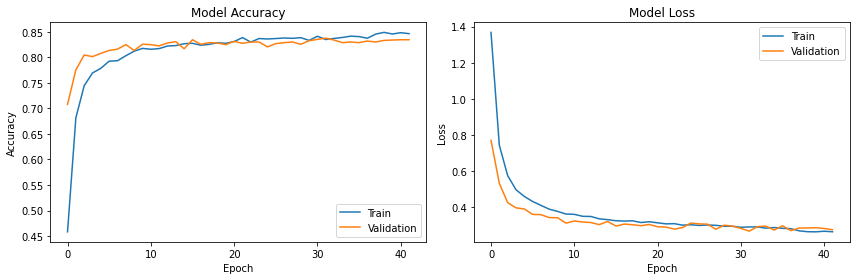

In [86]:
# 8. Visualize training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

In [89]:
# 1. Feature Engineering - Add derived features
def add_engineered_features(x):
    """Add engineered features to help the model learn patterns better"""
    # Original features: Ia, Ib, Ic, Va, Vb, Vc
    
    # Create a copy to avoid modifying the original
    import numpy as np
    x_new = x.copy()
    
    # Extract individual components for easier manipulation
    ia = x[:, 0]
    ib = x[:, 1]
    ic = x[:, 2]
    va = x[:, 3]
    vb = x[:, 4]
    vc = x[:, 5]
    
    # Calculate phase differences (useful for identifying fault types)
    phase_diff_ab = np.abs(ia - ib)
    phase_diff_bc = np.abs(ib - ic)
    phase_diff_ca = np.abs(ic - ia)
    
    # Calculate voltage-current ratios (impedance-like features)
    # Add small constant to avoid division by zero
    z_a = np.abs(va) / (np.abs(ia) + 1e-10)
    z_b = np.abs(vb) / (np.abs(ib) + 1e-10)
    z_c = np.abs(vc) / (np.abs(ic) + 1e-10)
    
    # Calculate power-related features
    p_a = va * ia
    p_b = vb * ib
    p_c = vc * ic
    
    # Stack new features to original features
    new_features = np.column_stack([
        phase_diff_ab.reshape(-1, 1),
        phase_diff_bc.reshape(-1, 1),
        phase_diff_ca.reshape(-1, 1),
        z_a.reshape(-1, 1),
        z_b.reshape(-1, 1),
        z_c.reshape(-1, 1),
        p_a.reshape(-1, 1),
        p_b.reshape(-1, 1),
        p_c.reshape(-1, 1)
    ])
    
    # Combine with original features
    x_engineered = np.hstack((x_new, new_features))
    
    return x_engineered

# Apply feature engineering to the datasets
X_train_eng = add_engineered_features(X_train)
X_valid_eng = add_engineered_features(X_valid)
X_test_eng = add_engineered_features(X_test)

# 2. Create an Ensemble of Models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, concatenate

def create_ensemble():
    # Model 1: Deep network
    input_layer = Input(shape=(X_train_eng.shape[1],))
    
    # Branch 1: Deep network
    x1 = Dense(128, activation='relu')(input_layer)
    x1 = Dropout(0.3)(x1)
    x1 = Dense(64, activation='relu')(x1)
    x1 = Dense(32, activation='relu')(x1)
    
    # Branch 2: Wider network
    x2 = Dense(256, activation='relu')(input_layer)
    x2 = Dropout(0.4)(x2)
    x2 = Dense(128, activation='relu')(x2)
    
    # Branch 3: Shallow network
    x3 = Dense(64, activation='relu')(input_layer)
    x3 = Dense(64, activation='relu')(x3)
    
    # Combine branches
    combined = concatenate([x1, x2, x3])
    
    # Output layer
    output = Dense(7, activation='softmax')(combined)
    
    # Create model
    model = Model(inputs=input_layer, outputs=output)
    
    # Compile
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create and train ensemble
ensemble_model = create_ensemble()

# 3. Example of k-fold cross-validation to get more robust results
from sklearn.model_selection import KFold

def train_with_kfold(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_results = []
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        print(f"Training fold {fold+1}/{n_splits}")
        
        # Split data
        X_fold_train, X_fold_val = X[train_idx], X[val_idx]
        y_fold_train, y_fold_val = y[train_idx], y[val_idx]
        
        # Create and compile model
        model = Sequential([
            Dense(128, activation='relu', input_shape=(X.shape[1],)),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(7, activation='softmax')
        ])
        
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
        # Train model
        history = model.fit(
            X_fold_train, y_fold_train,
            epochs=30,
            batch_size=32,
            validation_data=(X_fold_val, y_fold_val),
            class_weight=class_weight_dict,
            callbacks=[EarlyStopping(patience=5, restore_best_weights=True)],
            verbose=0
        )
        
        # Evaluate
        val_loss, val_acc = model.evaluate(X_fold_val, y_fold_val, verbose=0)
        fold_results.append((val_loss, val_acc))
        print(f"Fold {fold+1} validation accuracy: {val_acc:.4f}")
    
    # Calculate average performance
    avg_loss = np.mean([res[0] for res in fold_results])
    avg_acc = np.mean([res[1] for res in fold_results])
    print(f"Average validation loss: {avg_loss:.4f}")
    print(f"Average validation accuracy: {avg_acc:.4f}")
    
    return fold_results

# 4. Hyperparameter tuning
def train_with_hyperparams(neurons1, neurons2, dropout_rate, learning_rate):
    """Train model with specific hyperparameters and return validation accuracy"""
    model = Sequential([
        Dense(neurons1, activation='relu', input_shape=(X_train_eng.shape[1],)),
        Dropout(dropout_rate),
        Dense(neurons2, activation='relu'),
        Dense(7, activation='softmax')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    history = model.fit(
        X_train_eng, Y_train,
        epochs=20,
        batch_size=32,
        validation_data=(X_valid_eng, Y_valid),
        verbose=0
    )
    
    return max(history.history['val_accuracy'])

# Grid of hyperparameters to try
param_grid = {
    'neurons1': [64, 128, 256],
    'neurons2': [32, 64, 128],
    'dropout_rate': [0.2, 0.3, 0.4],
    'learning_rate': [0.01, 0.001, 0.0001]
}

# Example of how to use - uncomment to run
best_acc = 0
best_params = {}
for n1 in param_grid['neurons1']:
    for n2 in param_grid['neurons2']:
        for dr in param_grid['dropout_rate']:
            for lr in param_grid['learning_rate']:
                acc = train_with_hyperparams(n1, n2, dr, lr)
                if acc > best_acc:
                    best_acc = acc
                    best_params = {'neurons1': n1, 'neurons2': n2, 'dropout': dr, 'lr': lr}
                    print(f"New best: {best_acc:.4f} with {best_params}")

c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


New best: 0.7449 with {'neurons1': 64, 'neurons2': 32, 'dropout': 0.2, 'lr': 0.01}
New best: 0.7710 with {'neurons1': 64, 'neurons2': 32, 'dropout': 0.2, 'lr': 0.001}
New best: 0.7729 with {'neurons1': 64, 'neurons2': 32, 'dropout': 0.3, 'lr': 0.01}
New best: 0.7786 with {'neurons1': 64, 'neurons2': 64, 'dropout': 0.3, 'lr': 0.001}
New best: 0.7850 with {'neurons1': 64, 'neurons2': 128, 'dropout': 0.2, 'lr': 0.001}
New best: 0.7920 with {'neurons1': 128, 'neurons2': 128, 'dropout': 0.2, 'lr': 0.001}
New best: 0.7926 with {'neurons1': 256, 'neurons2': 128, 'dropout': 0.2, 'lr': 0.001}
